#important files

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

#Datasets


In [ ]:
matches =pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

#Basic details of matches dataset

In [ ]:
print(matches.shape)
matches.isnull().sum()

(1095, 20)


,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
matches.duplicated().sum()

np.int64(0)

## Details of the IPL over the seasons

### General Insight

In [ ]:
teams=matches['team1'].unique()
teams

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
matches_per_season=matches["season"].groupby(matches["season"]).count()
matches_per_season

,season
season,
2007/08,58
2009,57
2009/10,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


<ipython-input-30-dcf6cf4bea1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(matches_per_season,palette="viridis")


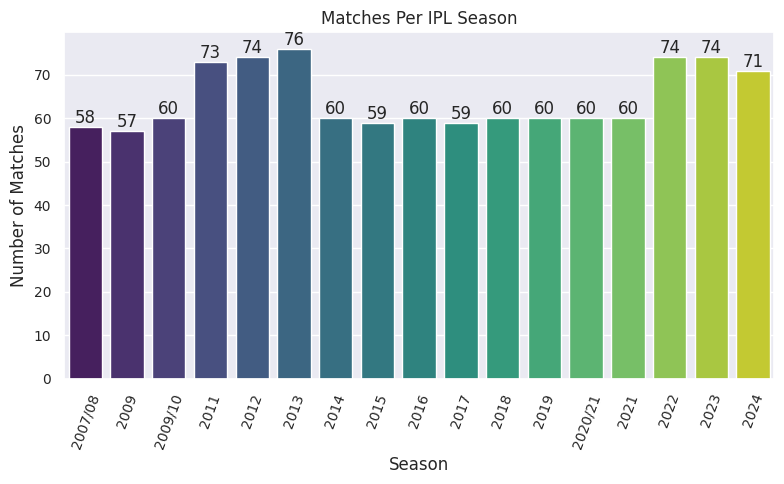

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(matches_per_season,palette="viridis")
for i in ax.containers:
  ax.bar_label(i)
plt.title("Matches Per IPL Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=70)
plt.tight_layout()

It can be seen that 2013 has the maximum number of matches played




###City and venue analysis

In [ ]:
''' which city hosted the most matches'''

city=matches["city"].groupby(matches["city"]).count()
print(city.sort_values(ascending=False).head(10))

city
Mumbai        173
Kolkata        93
Delhi          90
Chennai        85
Hyderabad      77
Bangalore      65
Chandigarh     61
Jaipur         57
Pune           51
Abu Dhabi      37
Name: city, dtype: int64


<ipython-input-32-f39361dea6db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(city.head(10),palette="viridis")


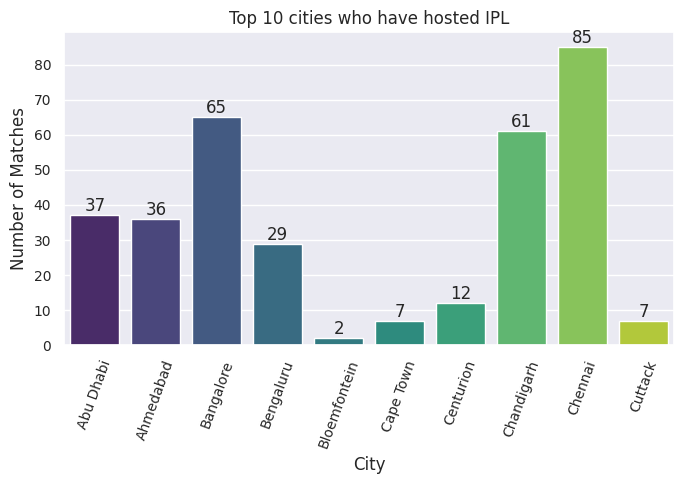

In [ ]:
plt.figure(figsize=(7,5))
ax=sns.barplot(city.head(10),palette="viridis")
for i in ax.containers:
  ax.bar_label(i)
plt.tight_layout()
plt.title("Top 10 cities who have hosted IPL")
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.xticks(rotation=70)
plt.tight_layout()

In [ ]:
''' Venues'''
venues=matches["venue"].groupby(matches["venue"]).count()
venues=venues.sort_values(ascending=False)
print(venues.head(10))


venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Name: venue, dtype: int64


<ipython-input-34-1d940fc41b3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=venues.head(10).index, y=venues.head(10).values, palette="viridis")


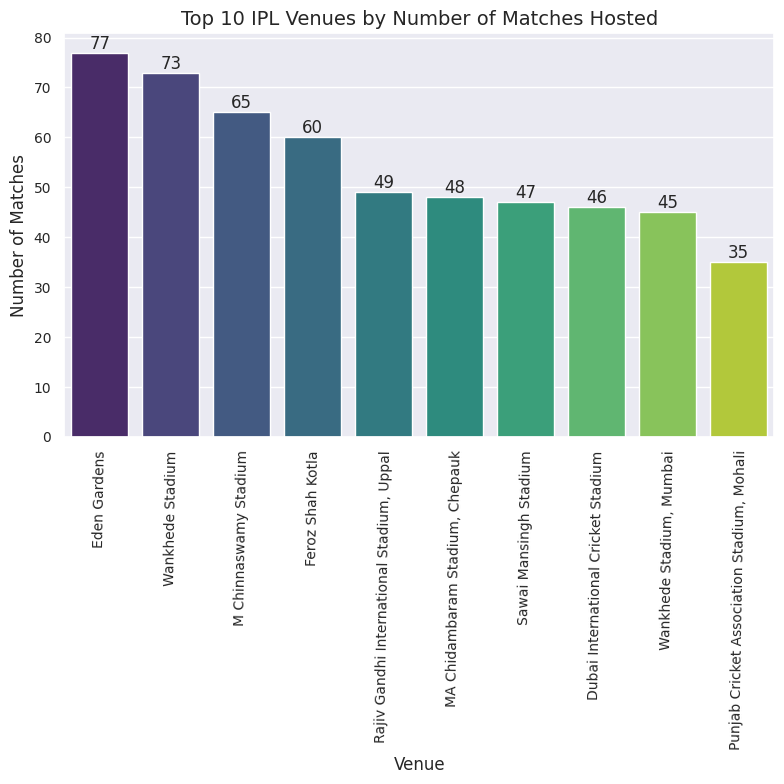

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=venues.head(10).index, y=venues.head(10).values, palette="viridis")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Top 10 IPL Venues by Number of Matches Hosted", fontsize=14) # Add a title
plt.xlabel("Venue")
plt.ylabel("Number of Matches")
plt.xticks(rotation=89)
plt.tight_layout()

plt.show()

### Overall Results thorugh out seasons

In [ ]:
'''matches ended up in a tie or no result'''
result=matches["result"].groupby(matches["result"]).count().sort_values(ascending=False)
print(result)

result
wickets      578
runs         498
tie           14
no result      5
Name: result, dtype: int64


<ipython-input-36-bd704613ee96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(result,palette="viridis")


Text(0.5, 0, 'Result')

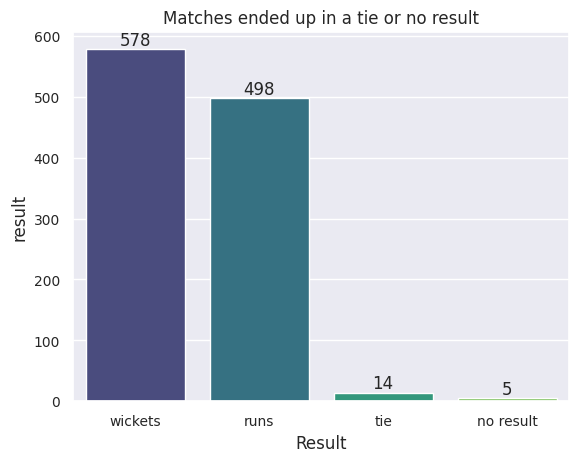

In [ ]:
ax=sns.barplot(result,palette="viridis")
for i in ax.containers:
  ax.bar_label(i)
plt.title("Matches ended up in a tie or no result")
plt.xlabel("Result")

### Toss and win analysis

In [ ]:
''' Toss wins'''
toss_win=matches["toss_winner"].groupby(matches["toss_winner"]).count()
print(toss_win.head(5))

toss_winner
Chennai Super Kings    122
Deccan Chargers         43
Delhi Capitals          50
Delhi Daredevils        80
Gujarat Lions           15
Name: toss_winner, dtype: int64


In [ ]:
# Consolidate team names for the 'toss_win' Series
if "Royal Challengers Bengaluru" in toss_win.index:
    toss_win["Royal Challengers Bangalore"] = toss_win.get("Royal Challengers Bangalore", 0) + toss_win["Royal Challengers Bengaluru"]
    toss_win.drop("Royal Challengers Bengaluru", inplace=True)

if "Delhi Capitals" in toss_win.index:
    toss_win["Delhi Daredevils"] = toss_win.get("Delhi Daredevils", 0) + toss_win["Delhi Capitals"]
    toss_win.drop("Delhi Capitals", inplace=True)

if "Punjab Kings" in toss_win.index:
    toss_win["Kings XI Punjab"] = toss_win.get("Kings XI Punjab", 0) + toss_win["Punjab Kings"]
    toss_win.drop("Punjab Kings", inplace=True)

if "Deccan Chargers" in toss_win.index:
    toss_win["Sunrisers Hyderabad"] = toss_win.get("Sunrisers Hyderabad", 0) + toss_win["Deccan Chargers"]
    toss_win.drop("Deccan Chargers", inplace=True)

# Consolidate Rising Pune Supergiant and Pune Warriors into Rising Pune Supergiants
if "Rising Pune Supergiant" in toss_win.index:
    toss_win["Rising Pune Supergiants"] = toss_win.get("Rising Pune Supergiants", 0) + toss_win["Rising Pune Supergiant"]
    toss_win.drop("Rising Pune Supergiant", inplace=True)
if "Pune Warriors" in toss_win.index:
     toss_win["Rising Pune Supergiants"] = toss_win.get("Rising Pune Supergiants", 0) + toss_win["Pune Warriors"]
     toss_win.drop("Pune Warriors", inplace=True)


# Corrected logic for Gujarat teams
# Assuming the intention is to consolidate Gujarat Titans wins into Gujarat Lions
if "Gujarat Titans" in toss_win.index:
     toss_win["Gujarat Lions"] = toss_win.get("Gujarat Lions", 0) + toss_win["Gujarat Titans"]
     toss_win.drop("Gujarat Titans", inplace=True)

toss_win

,toss_winner
toss_winner,
Chennai Super Kings,122
Delhi Daredevils,130
Gujarat Lions,37
Kings XI Punjab,109
Kochi Tuskers Kerala,8
Kolkata Knight Riders,122
Lucknow Super Giants,19
Mumbai Indians,143
Rajasthan Royals,120


<ipython-input-39-7d395103e290>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(toss_win,palette="viridis")


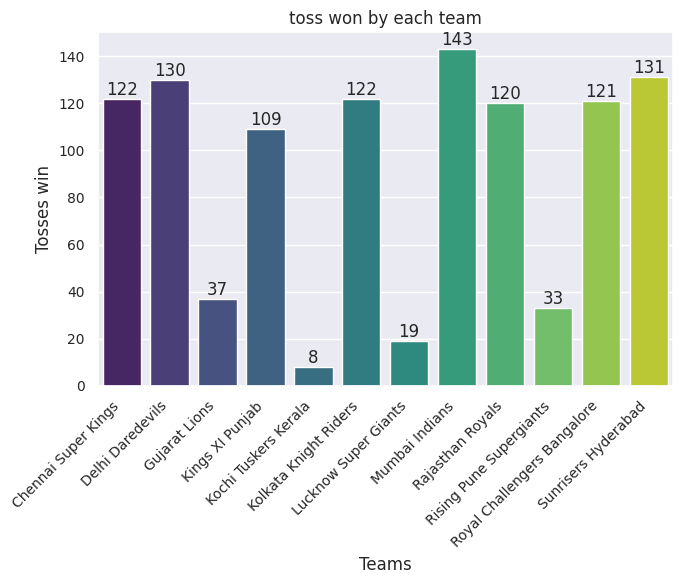

In [ ]:
plt.figure(figsize=(7,6))
sns.set(rc={
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})
ax=sns.barplot(toss_win,palette="viridis")
for i in ax.containers:
  ax.bar_label(i)
plt.title("toss won by each team")
plt.xlabel("Teams")
plt.xticks(rotation=45,ha='right')
plt.ylabel("Tosses win")
plt.tight_layout()

In [ ]:
winner=matches["winner"].groupby(matches["winner"]).count()
# Consolidate team names for the 'winner' Series
if "Royal Challengers Bengaluru" in winner.index:
    winner["Royal Challengers Bangalore"] = winner.get("Royal Challengers Bangalore", 0) + winner["Royal Challengers Bengaluru"]
    winner.drop("Royal Challengers Bengaluru", inplace=True)

if "Delhi Capitals" in winner.index:
    winner["Delhi Daredevils"] = winner.get("Delhi Daredevils", 0) + winner["Delhi Capitals"]
    winner.drop("Delhi Capitals", inplace=True)

if "Punjab Kings" in winner.index:
    winner["Kings XI Punjab"] = winner.get("Kings XI Punjab", 0) + winner["Punjab Kings"]
    winner.drop("Punjab Kings", inplace=True)

if "Deccan Chargers" in winner.index:
    winner["Sunrisers Hyderabad"] = winner.get("Sunrisers Hyderabad", 0) + winner["Deccan Chargers"]
    winner.drop("Deccan Chargers", inplace=True)

if "Rising Pune Supergiant" in winner.index:
    winner["Rising Pune Supergiants"] = winner.get("Rising Pune Supergiants", 0) + winner["Rising Pune Supergiant"]+winner["Pune Warriors"]
    winner.drop("Rising Pune Supergiant", inplace=True)
    winner.drop("Pune Warriors", inplace=True)

if "Gujarat Titans" in winner.index: # Corrected from Gujarat Lions to Gujarat Titans based on common renamings
     winner["Gujarat Lions"] = winner.get("Gujarat Lions", 0) + winner["Gujarat Titans"]
     winner.drop("Gujarat Titans", inplace=True)

winner

,winner
winner,
Chennai Super Kings,138
Delhi Daredevils,115
Gujarat Lions,41
Kings XI Punjab,112
Kochi Tuskers Kerala,6
Kolkata Knight Riders,131
Lucknow Super Giants,24
Mumbai Indians,144
Rajasthan Royals,112


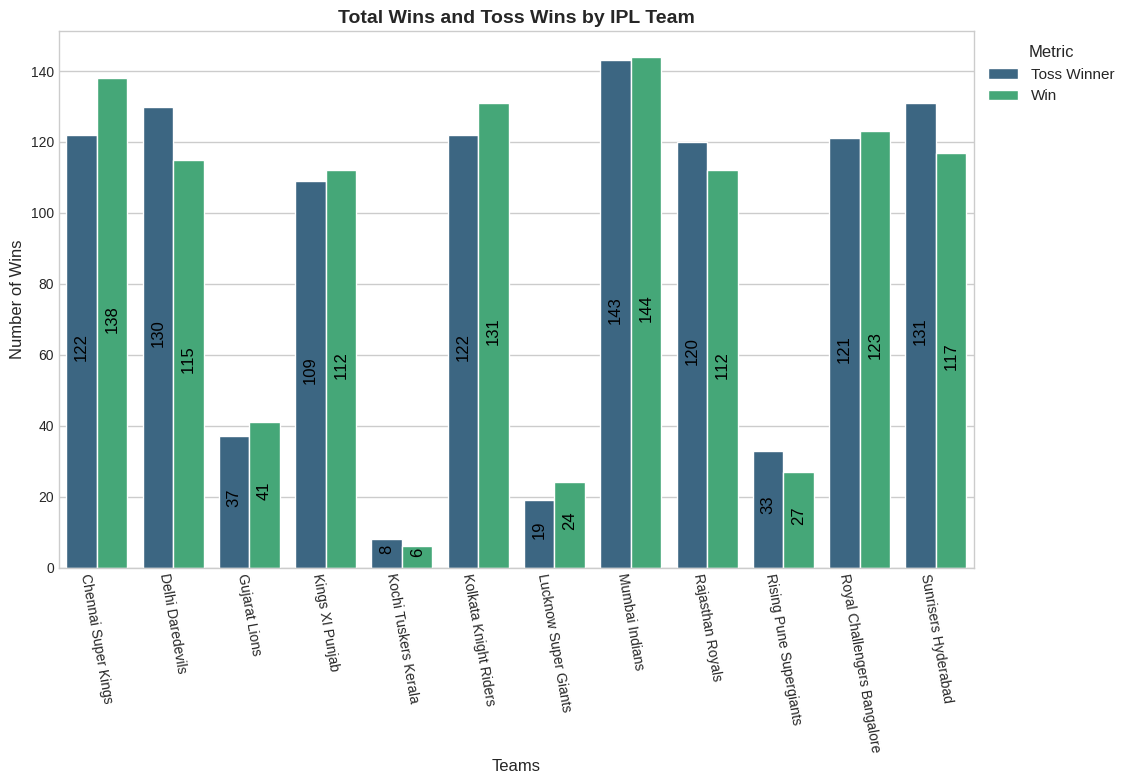

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')

match_toss_win = pd.DataFrame({'Toss Winner': toss_win, 'Win': winner}).fillna(0)
match_toss_win_reset = match_toss_win.reset_index()

match_toss_win_long = match_toss_win_reset.melt(
    id_vars='index',
    value_vars=['Toss Winner', 'Win'],
    var_name='Metric',
    value_name='Count'
)

ax = sns.barplot(x='index', y='Count', hue='Metric', data=match_toss_win_long, palette='viridis')

plt.title("Total Wins and Toss Wins by IPL Team", fontsize=14, fontweight='bold')
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)
plt.xticks(rotation=-80,)

# This loop adds the values inside each bar
for container in ax.containers:
    # Changed label_type from 'inside' to 'center' and added rotation
    ax.bar_label(container, fmt='%d', label_type='center', padding=3, color='black', rotation=90)

# Correct the legend title and location
plt.legend(title="Metric", bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()

### Teams Performances

<ipython-input-42-9fb4813cf0cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(winner,palette="viridis")


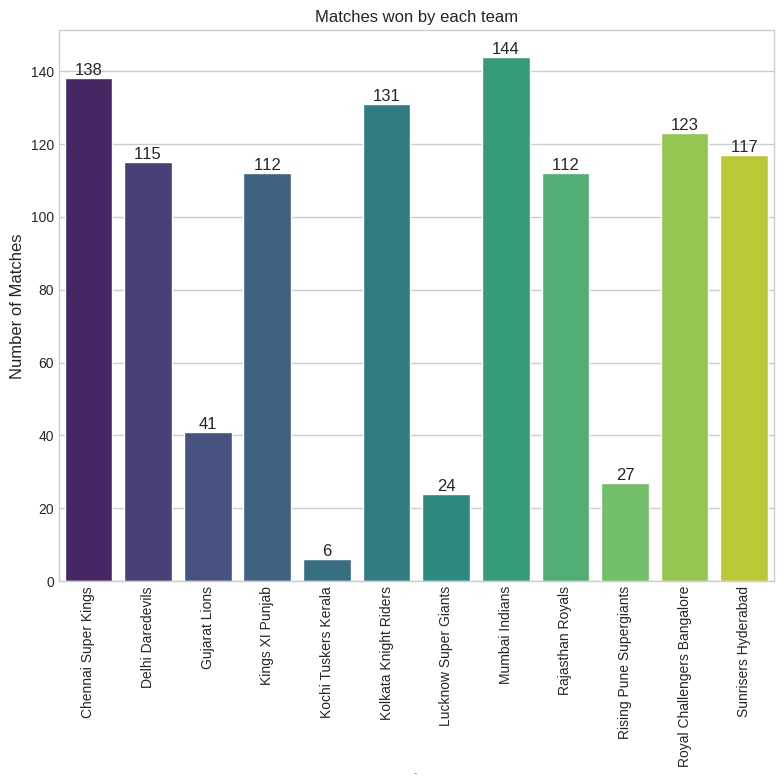

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.barplot(winner,palette="viridis")
for i in ax.containers:
  ax.bar_label(i)
plt.title("Matches won by each team")
plt.xlabel("Teams",fontsize=1)
plt.xticks(rotation=90)
plt.ylabel("Number of Matches")
plt.tight_layout()


In [ ]:
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()


# Consolidate team names for the 'matches_played' Series
# The 'winner' series was already consolidated in the previous cell.
if "Royal Challengers Bengaluru" in matches_played.index:
    matches_played["Royal Challengers Bangalore"] = matches_played.get("Royal Challengers Bangalore", 0) + matches_played["Royal Challengers Bengaluru"]
    matches_played.drop("Royal Challengers Bengaluru", inplace=True)

if "Delhi Capitals" in matches_played.index:
    matches_played["Delhi Daredevils"] = matches_played.get("Delhi Daredevils", 0) + matches_played["Delhi Capitals"]
    matches_played.drop("Delhi Capitals", inplace=True)

if "Punjab Kings" in matches_played.index:
    matches_played["Kings XI Punjab"] = matches_played.get("Kings XI Punjab", 0) + matches_played["Punjab Kings"]
    matches_played.drop("Punjab Kings", inplace=True)

if "Deccan Chargers" in matches_played.index:
    matches_played["Sunrisers Hyderabad"] = matches_played.get("Sunrisers Hyderabad", 0) + matches_played["Deccan Chargers"]
    matches_played.drop("Deccan Chargers", inplace=True)

if "Rising Pune Supergiant" in matches_played.index:
    matches_played["Rising Pune Supergiants"] = matches_played.get("Rising Pune Supergiants", 0) + matches_played["Rising Pune Supergiant"]
    matches_played.drop("Rising Pune Supergiant", inplace=True)
if "Pune Warriors" in matches_played.index:
     matches_played["Rising Pune Supergiants"] = matches_played.get("Rising Pune Supergiants", 0) + matches_played["Pune Warriors"]
     matches_played.drop("Pune Warriors", inplace=True)


if "Gujarat Titans" in matches_played.index:
     matches_played["Gujarat Lions"] = matches_played.get("Gujarat Lions", 0) + matches_played["Gujarat Titans"]
     matches_played.drop("Gujarat Titans", inplace=True)


team_stats=pd.DataFrame({"Total matches":matches_played,"Total wins":winner})
win_percentage= winner/matches_played *100
team_stats=team_stats.assign(win_percentage=win_percentage)
team_stats

,Total matches,Total wins,win_percentage
Chennai Super Kings,238,138,57.983193
Delhi Daredevils,252,115,45.634921
Gujarat Lions,75,41,54.666667
Kings XI Punjab,246,112,45.528455
Kochi Tuskers Kerala,14,6,42.857143
Kolkata Knight Riders,251,131,52.191235
Lucknow Super Giants,44,24,54.545455
Mumbai Indians,261,144,55.172414
Rajasthan Royals,221,112,50.678733
Rising Pune Supergiants,76,27,35.526316


None


<ipython-input-44-01341312fcc2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="win_percentage", y=team_stats.index, data=team_stats,palette="viridis")


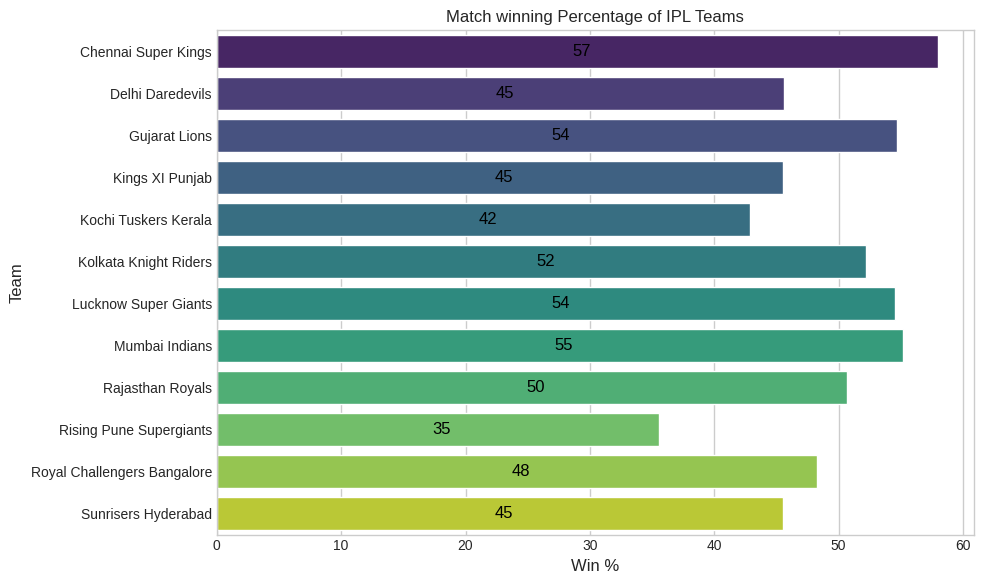

In [ ]:
plt.figure(figsize=(10, 6))
print(team_stats.index.name)
# Use team_stats.index for the y-axis to match the data length
ax=sns.barplot(x="win_percentage", y=team_stats.index, data=team_stats,palette="viridis")
for i in ax.containers:
  ax.bar_label(i,fmt='%d', label_type='center', padding=3, color='black')

plt.title("Match winning Percentage of IPL Teams")
plt.xlabel("Win %")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [ ]:
'''Each season Winner'''
season_winners=matches["winner"].groupby([matches["match_type"],matches["season"]]).value_counts()

In [ ]:
#overall winnings
season_winners=matches["winner"].groupby(matches["match_type"]).value_counts()
season_winners["Final"]

,count
winner,
Chennai Super Kings,5
Mumbai Indians,5
Kolkata Knight Riders,3
Deccan Chargers,1
Gujarat Titans,1
Rajasthan Royals,1
Sunrisers Hyderabad,1


<Figure size 800x800 with 0 Axes>

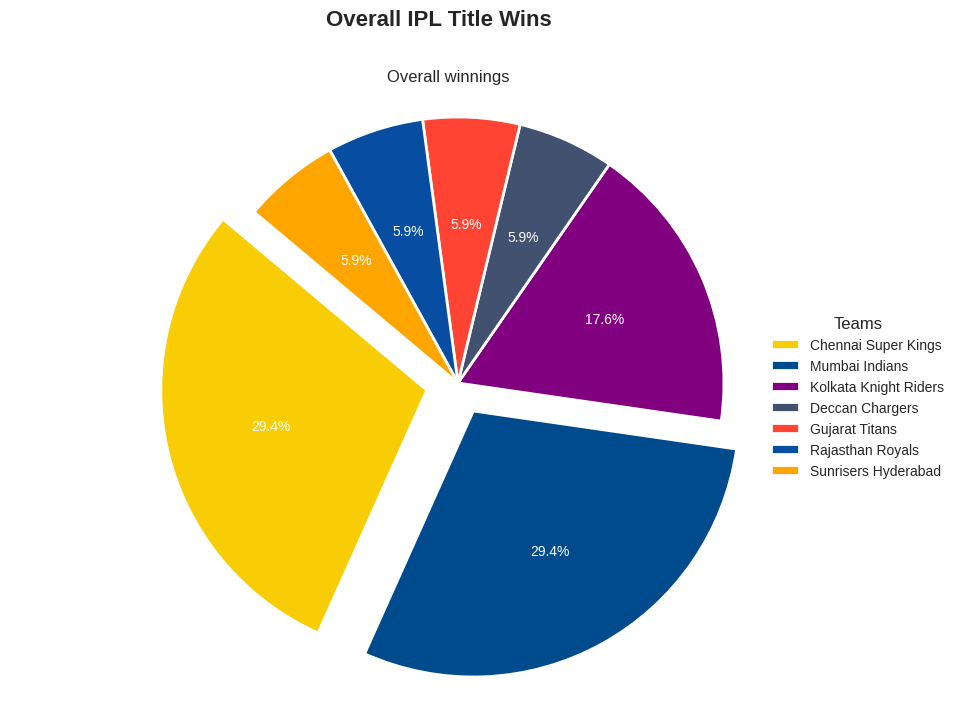

In [ ]:
plt.figure(figsize=(8,8))
plt.style.use('seaborn-v0_8-muted')
fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle("Overall IPL Title Wins", fontsize=16, fontweight='bold')
plt.title("Overall winnings")
explode=[0]*len(season_winners["Final"])
explode[0]=0.12
explode[1]=0.12
mycolour=["#F9CD05","#004B8D","purple","#425170","#FF4433","#074EA2","orange"]
wedges, texts, autotexts = ax.pie(
    season_winners["Final"],
    labels=season_winners["Final"].index,
    explode=explode,
    colors=mycolour,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10, 'color': 'white'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
ax.legend(
    wedges,
    season_winners["Final"].index,
    title="Teams",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False,  # No border
    fontsize=10,
    title_fontsize=12
)
plt.axis('equal')
plt.show()

In [ ]:
#which team has the best head to head record againt all other  team
teams=pd.unique(matches[["team1","team2"]].values.ravel('K'))

hth_data = []
for i in range(len(teams)):
  for j in range(i+1,len(teams)):
    teama=teams[i]
    teamb=teams[j]
    win_a_team1 = matches[(matches["team1"]==teama) & (matches["winner"]==teama)].shape[0]
    win_a_team2 = matches[(matches["team2"]==teama) & (matches["winner"]==teama)].shape[0]
    win_a = win_a_team1 + win_a_team2
    win_b_team1 = matches[(matches["team1"]==teamb) & (matches["winner"]==teamb)].shape[0]
    win_b_team2 = matches[(matches["team2"]==teamb) & (matches["winner"]==teamb)].shape[0]
    win_b = win_b_team1 + win_b_team2

    hth_data.append({"Team A":teama,"Team B":teamb,"A win":win_a,"B win":win_b})
htd = pd.DataFrame(hth_data)
htd.sort_values(by="A win",ascending=False)

,Team A,Team B,A win,B win
64,Mumbai Indians,Gujarat Titans,144,28
65,Mumbai Indians,Royal Challengers Bengaluru,144,7
62,Mumbai Indians,Punjab Kings,144,24
51,Mumbai Indians,Kolkata Knight Riders,144,131
52,Mumbai Indians,Rajasthan Royals,144,112
...,...,...,...,...
151,Rising Pune Supergiants,Delhi Capitals,5,48
150,Rising Pune Supergiants,Rising Pune Supergiant,5,10
153,Rising Pune Supergiants,Lucknow Super Giants,5,24
152,Rising Pune Supergiants,Punjab Kings,5,24


In [ ]:
run_margin=matches[["team1","team2","winner","result","result_margin"]]
run_margin.sort_values(by="result_margin",ascending=False).head(5)

,team1,team2,winner,result,result_margin
620,Delhi Daredevils,Mumbai Indians,Mumbai Indians,runs,146.0
560,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,runs,144.0
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,140.0
496,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,runs,138.0
352,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,runs,130.0


In [ ]:
wicket_margin=matches[["team1","team2","winner","result","result_margin"]]
run_margin.sort_values(by="result",ascending=False)

,team1,team2,winner,result,result_margin
547,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,wickets,8.0
617,Delhi Daredevils,Gujarat Lions,Delhi Daredevils,wickets,7.0
601,Rising Pune Supergiant,Sunrisers Hyderabad,Rising Pune Supergiant,wickets,6.0
605,Rising Pune Supergiant,Kolkata Knight Riders,Kolkata Knight Riders,wickets,7.0
606,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,wickets,7.0
...,...,...,...,...,...
994,Lucknow Super Giants,Chennai Super Kings,NaN,no result,NaN
241,Delhi Daredevils,Pune Warriors,NaN,no result,NaN
511,Royal Challengers Bangalore,Delhi Daredevils,NaN,no result,NaN
485,Royal Challengers Bangalore,Rajasthan Royals,NaN,no result,NaN


### Indivisual Player analysis

In [ ]:
motm = matches["player_of_match"].value_counts()

# Identify players with only one 'Man of the Match' award
single_award_players = motm[motm <5].index
for player in single_award_players:
    motm['Others'] = motm.get('Others', 0) + motm[player]
    del motm[player]

print(motm)

player_of_match
AB de Villiers       25
CH Gayle             22
RG Sharma            19
V Kohli              18
DA Warner            18
                   ... 
Yuvraj Singh          5
SPD Smith             5
DPMD Jayawardene      5
YBK Jaiswal           5
Others              370
Name: count, Length: 79, dtype: int64


<ipython-input-52-6311cf18e180>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=motm.head(10).index, y=motm.head(10).values, palette="Blues_d")


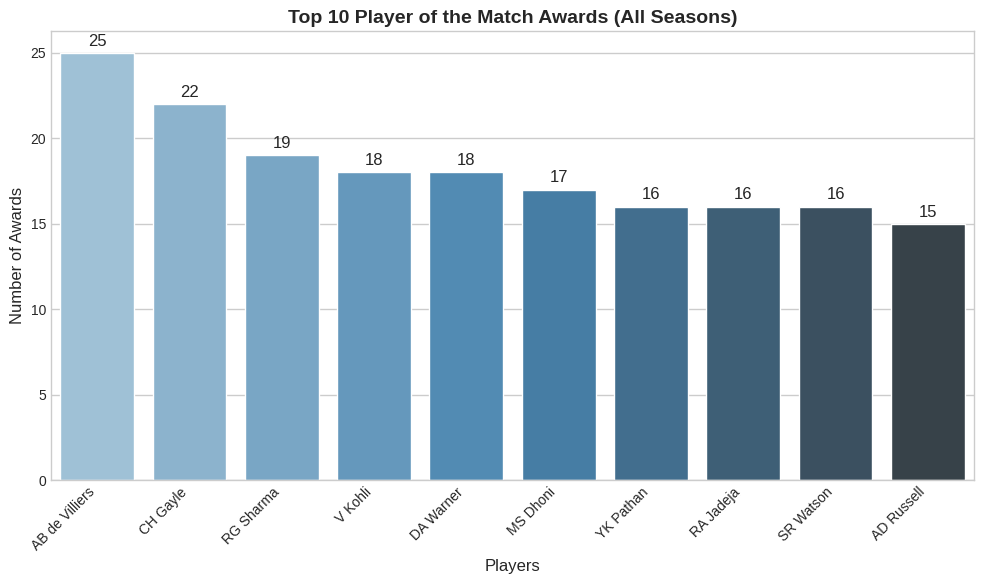

In [ ]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')
ax = sns.barplot(x=motm.head(10).index, y=motm.head(10).values, palette="Blues_d")

for i in ax.containers:
  ax.bar_label(i, fmt='%d', label_type='edge', padding=3)

plt.title("Top 10 Player of the Match Awards (All Seasons)", fontsize=14, fontweight='bold')
plt.xlabel("Players", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Awards", fontsize=12)

plt.tight_layout()
plt.show()


### Indivisual Team Analysis

In [ ]:
team_name = 'Kolkata Knight Riders'
team_wins_per_season = matches[matches['winner'] == team_name] \
    .groupby('season') \
    .size() \
    .reset_index(name='wins')



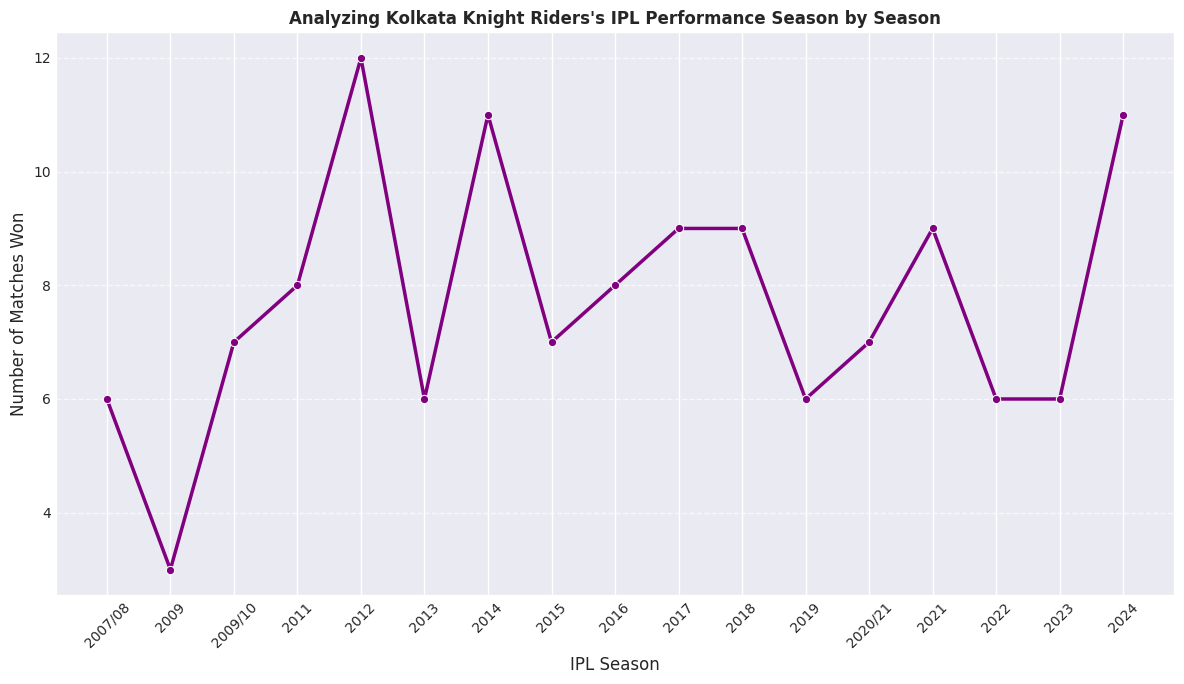

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))
sns.lineplot(x='season', y='wins', data=team_wins_per_season ,marker='o',color='purple',linewidth=2.5 )
plt.title(f"Analyzing {team_name}'s IPL Performance Season by Season",fontweight='bold')
plt.xlabel("IPL Season")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()